# IMPORTAÇÃO DAS BIBLIOTECAS 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTAÇÃO DOS DADOS 

In [2]:
#SELEÇÃO DE COLUNAS
colunas = ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'MP','Comp', 'Gls', 'Ast', 'G+A','Saves','Tkl+Int','KP']

In [3]:
#lendo o arquivo CSV com as colunas especificadas
df = pd.read_csv('players_data_light-2024_2025.csv',usecols=colunas)
df.head()


,Player,Nation,Pos,Squad,Comp,Age,MP,Gls,Ast,G+A,KP,Tkl+Int,Saves
0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,3,0,0,0,0,3,NaN
1,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,4,0,0,0,1,4,NaN
2,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,1,0,0,0,0,4,NaN
3,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,6,0,0,0,0,5,NaN
4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,1,0,0,0,0,1,NaN


# INFORMAÇÕES DOS DADOS 

In [4]:
df.shape

(2854, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   2854 non-null   object 
 1   Nation   2847 non-null   object 
 2   Pos      2854 non-null   object 
 3   Squad    2854 non-null   object 
 4   Comp     2854 non-null   object 
 5   Age      2846 non-null   float64
 6   MP       2854 non-null   int64  
 7   Gls      2854 non-null   int64  
 8   Ast      2854 non-null   int64  
 9   G+A      2854 non-null   int64  
 10  KP       2854 non-null   int64  
 11  Tkl+Int  2854 non-null   int64  
 12  Saves    212 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 290.0+ KB


In [6]:
df.describe()

,Age,MP,Gls,Ast,G+A,KP,Tkl+Int,Saves
count,2846.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,212.000000
mean,25.018974,19.012964,1.682901,1.200771,2.883672,11.421864,30.230904,47.240566
std,4.491624,11.502122,3.152732,1.946170,4.530513,14.207590,31.016525,39.833464
min,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,0.000000,0.000000,0.000000,1.000000,4.000000,11.000000
50%,25.000000,20.000000,0.000000,0.000000,1.000000,6.000000,20.000000,36.500000
75%,28.000000,30.000000,2.000000,2.000000,4.000000,16.750000,48.000000,83.000000
max,41.000000,38.000000,31.000000,18.000000,47.000000,95.000000,181.000000,150.000000


# LIMPEZA E ORGANIZAÇÃO DOS DADOS

In [7]:
df = df.drop_duplicates()

In [17]:
df.shape

(2854, 13)

In [8]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df.head()

,Player,Nation,Pos,Squad,Comp,Age,MP,Gls,Ast,G+A,KP,Tkl+Int,Saves
0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,3,0,0,0,0,3,NaN
1,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,4,0,0,0,1,4,NaN
2,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,1,0,0,0,0,4,NaN
3,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,6,0,0,0,0,5,NaN
4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,1,0,0,0,0,1,NaN


In [9]:
# Limpando a coluna Nation
df['Nation'] = df['Nation'].str.split().str[-1]

# Limpando a coluna Pos
df['Pos'] = df['Pos'].str.split(",").str[0]

df.head()

,Player,Nation,Pos,Squad,Comp,Age,MP,Gls,Ast,G+A,KP,Tkl+Int,Saves
0,Max Aarons,ENG,DF,Bournemouth,eng Premier League,24.0,3,0,0,0,0,3,NaN
1,Max Aarons,ENG,DF,Valencia,es La Liga,24.0,4,0,0,0,1,4,NaN
2,Rodrigo Abajas,ESP,DF,Valencia,es La Liga,21.0,1,0,0,0,0,4,NaN
3,James Abankwah,IRL,DF,Udinese,it Serie A,20.0,6,0,0,0,0,5,NaN
4,Keyliane Abdallah,FRA,FW,Marseille,fr Ligue 1,18.0,1,0,0,0,0,1,NaN


In [10]:
df["Comp"] = df["Comp"].str.replace(r'^\S+\s+', '', regex=True) # Remove a primeira palavra da coluna 'Comp', mantendo o texto após o primeiro espaço

df.head()


,Player,Nation,Pos,Squad,Comp,Age,MP,Gls,Ast,G+A,KP,Tkl+Int,Saves
0,Max Aarons,ENG,DF,Bournemouth,Premier League,24.0,3,0,0,0,0,3,NaN
1,Max Aarons,ENG,DF,Valencia,La Liga,24.0,4,0,0,0,1,4,NaN
2,Rodrigo Abajas,ESP,DF,Valencia,La Liga,21.0,1,0,0,0,0,4,NaN
3,James Abankwah,IRL,DF,Udinese,Serie A,20.0,6,0,0,0,0,5,NaN
4,Keyliane Abdallah,FRA,FW,Marseille,Ligue 1,18.0,1,0,0,0,0,1,NaN


# EXPLORANDO OS DADOS   

Quantidade de jogadores liga
Comp
Serie A           634
La Liga           601
Premier League    574
Ligue 1           553
Bundesliga        492
Name: count, dtype: int64


C:\Users\FROST\AppData\Local\Temp\ipykernel_11908\3253053468.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


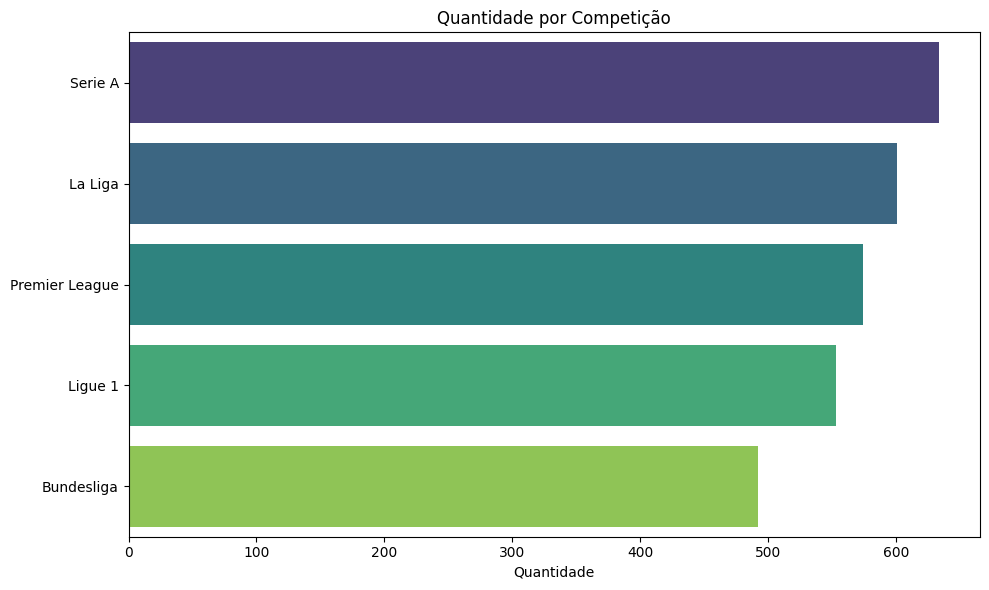

In [32]:
#Quantidade de jogadores liga
print('Quantidade de jogadores liga')
df['Comp'].value_counts()
print(df['Comp'].value_counts())
plt.figure(figsize=(10, 6))

ax = sns.countplot(
    data=df,
    y="Comp",
    order=df["Comp"].value_counts().index,
     palette='viridis',
)

ax.set_title("Quantidade por Competição")
ax.set_xlabel("Quantidade")
ax.set_ylabel("")

plt.tight_layout()
plt.show()


Quantidade de jogadores por posição
Pos
DF    1022
MF     900
FW     720
GK     212
Name: count, dtype: int64


C:\Users\FROST\AppData\Local\Temp\ipykernel_11908\3006339291.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


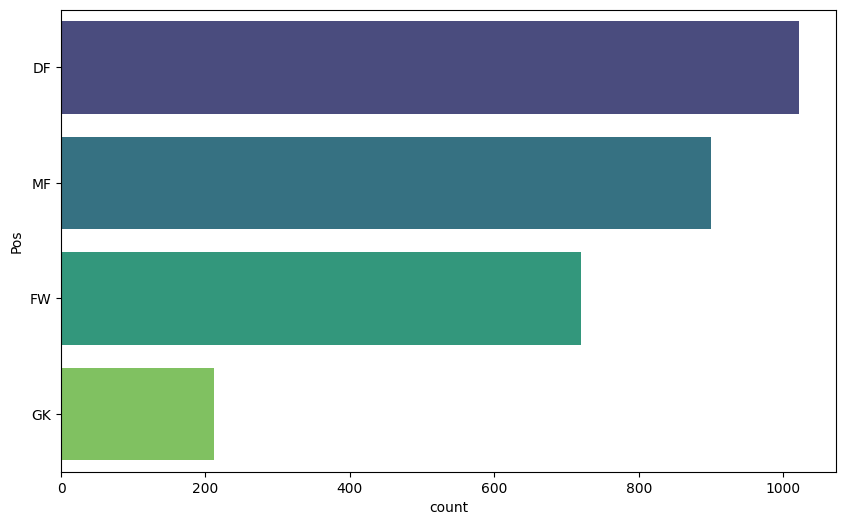

In [33]:
# Quantidade de jogadores por posição
print('Quantidade de jogadores por posição')
df['Pos'].value_counts()
print(df['Pos'].value_counts())
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    y="Pos",
    order=df["Pos"].value_counts().index,
     palette='viridis',
) 

Top 10 jogadores com mais gols:
                  Player  Gls Nation Pos            Squad            Comp
1691       Kylian Mbappé   31    FRA  FW      Real Madrid         La Liga
2304       Mohamed Salah   29    EGY  FW        Liverpool  Premier League
1483  Robert Lewandowski   27    POL  FW        Barcelona         La Liga
1317          Harry Kane   26    ENG  FW    Bayern Munich      Bundesliga
2201       Mateo Retegui   25    ITA  FW         Atalanta         Serie A
1219      Alexander Isak   23    SWE  FW    Newcastle Utd  Premier League
1109      Erling Haaland   22    NOR  FW  Manchester City  Premier League
1093     Serhou Guirassy   21    GUI  FW         Dortmund      Bundesliga
697      Ousmane Dembélé   21    FRA  FW        Paris S-G         Ligue 1
1060     Mason Greenwood   21    ENG  FW        Marseille         Ligue 1


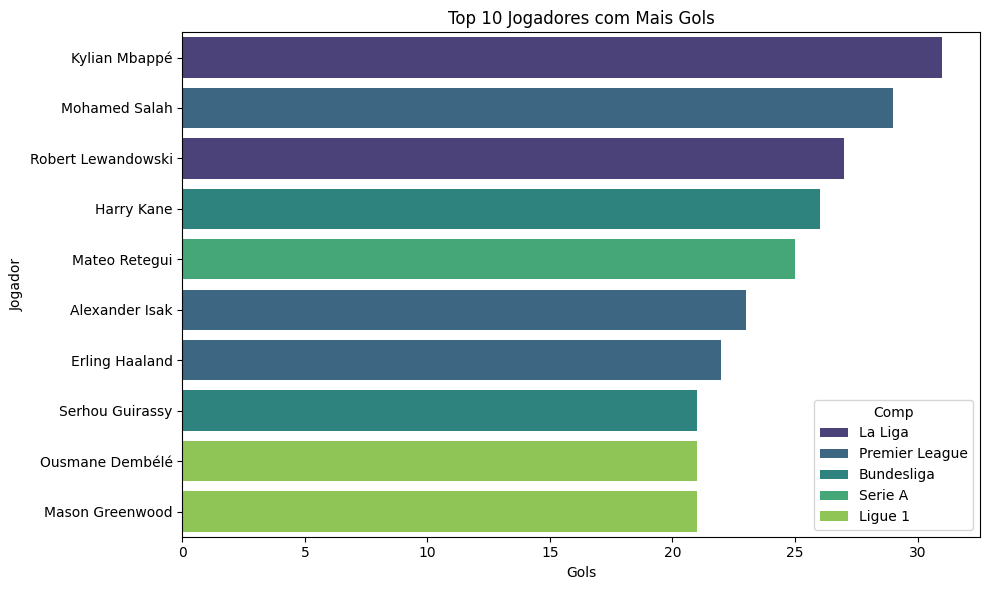

In [38]:
#top 10 jogadores com mais gols
top_10_goals = df.sort_values(by='Gls', ascending=False).head(10)
print("Top 10 jogadores com mais gols:")        
print(top_10_goals[['Player', 'Gls', 'Nation', 'Pos', 'Squad', 'Comp']])

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_10_goals,
    x='Gls',
    y='Player',
    palette='viridis',
      hue='Comp'
)
ax.set_title("Top 10 Jogadores com Mais Gols")
ax.set_xlabel("Gols")
ax.set_ylabel("Jogador")
plt.tight_layout()
plt.show()

Top 10 jogadores com mais assistências:
               Player  Ast Nation Pos            Squad            Comp
2304    Mohamed Salah   18    EGY  FW        Liverpool  Premier League
1960    Michael Olise   15    FRA  FW    Bayern Munich      Bundesliga
2792     Lamine Yamal   13    ESP  FW        Barcelona         La Liga
2779    Florian Wirtz   12    GER  MF       Leverkusen      Bundesliga
1830     Jacob Murphy   12    ENG  FW    Newcastle Utd  Premier League
829    Anthony Elanga   11    SWE  FW  Nott'ham Forest  Premier League
1064   Vincenzo Grifo   11    ITA  FW         Freiburg      Bundesliga
2099    Gaëtan Perrin   11    FRA  MF          Auxerre         Ligue 1
541      Rayan Cherki   11    FRA  FW             Lyon         Ligue 1
238   Bradley Barcola   10    FRA  FW        Paris S-G         Ligue 1


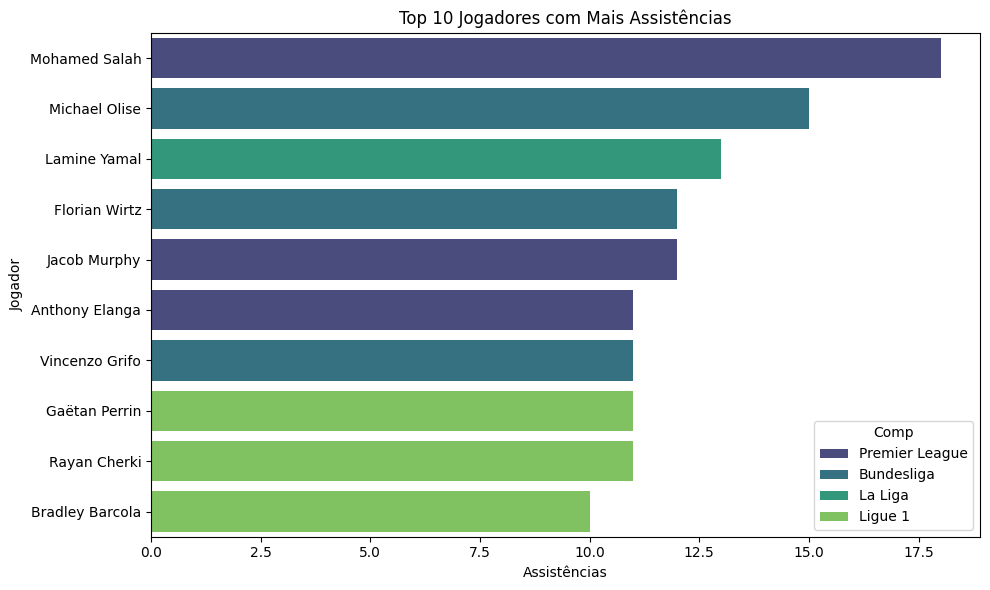

In [37]:
#top assistencias
top_10_assists = df.sort_values(by='Ast', ascending=False).head(10)
print("Top 10 jogadores com mais assistências:")
print(top_10_assists[['Player', 'Ast', 'Nation', 'Pos', 'Squad', 'Comp']])

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_10_assists,
    x='Ast',
    y='Player',
    palette='viridis',
      hue='Comp'
)
ax.set_title("Top 10 Jogadores com Mais Assistências")
ax.set_xlabel("Assistências")
ax.set_ylabel("Jogador")
plt.tight_layout()
plt.show()

Top 10 jogadores com mais participações em gols (G+A):
                  Player  G+A Nation Pos          Squad            Comp
2304       Mohamed Salah   47    EGY  FW      Liverpool  Premier League
1317          Harry Kane   35    ENG  FW  Bayern Munich      Bundesliga
1691       Kylian Mbappé   34    FRA  FW    Real Madrid         La Liga
2201       Mateo Retegui   33    ITA  FW       Atalanta         Serie A
1219      Alexander Isak   29    SWE  FW  Newcastle Utd  Premier League
1483  Robert Lewandowski   29    POL  FW      Barcelona         La Liga
1960       Michael Olise   27    FRA  FW  Bayern Munich      Bundesliga
2177            Raphinha   27    BRA  FW      Barcelona         La Liga
697      Ousmane Dembélé   27    FRA  FW      Paris S-G         Ligue 1
1693        Bryan Mbeumo   27    CMR  FW      Brentford  Premier League


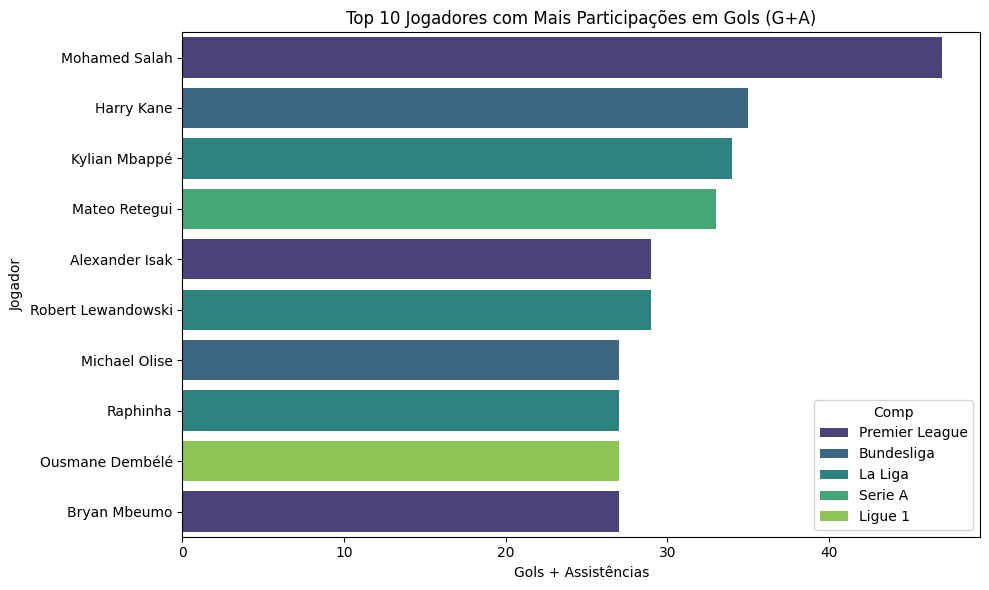

In [36]:
#top  10 jogadores com mais participações em gols (G+A)
top_10_goal_contributions = df.sort_values(by='G+A', ascending=False).head(10)
print("Top 10 jogadores com mais participações em gols (G+A):")             
print(top_10_goal_contributions[['Player', 'G+A', 'Nation', 'Pos', 'Squad', 'Comp']])
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_10_goal_contributions,
    x='G+A',
    y='Player',
    palette='viridis',
    hue='Comp'
)
ax.set_title("Top 10 Jogadores com Mais Participações em Gols (G+A)")
ax.set_xlabel("Gols + Assistências")
ax.set_ylabel("Jogador")
plt.tight_layout()
plt.show()


Top 10 melhores defensores (Tkl+Int):
                  Player  Tkl+Int Nation Pos           Squad            Comp
962   Idrissa Gana Gueye      181    SEN  MF         Everton  Premier League
1823        Daniel Muñoz      167    COL  DF  Crystal Palace  Premier League
434       Moisés Caicedo      163    ECU  MF         Chelsea  Premier League
2223    Antonee Robinson      157    USA  DF          Fulham  Premier League
1161      Omar El Hilali      157    MAR  DF        Espanyol         La Liga
125       Benjamin André      151    FRA  MF           Lille         Ligue 1
489              Carmona      151    ESP  DF         Sevilla         La Liga
935      Morten Frendrup      149    DEN  MF           Genoa         Serie A
1685   Noussair Mazraoui      149    MAR  DF  Manchester Utd  Premier League
2568     Nahuel Tenaglia      143    ARG  DF          Alavés         La Liga


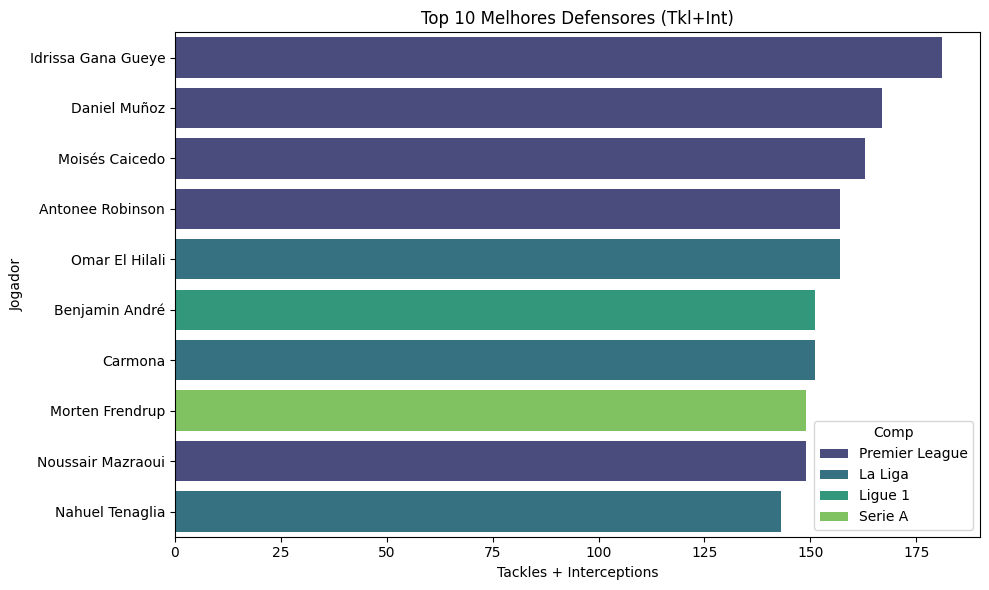

In [35]:
# top  melhores defensores (Tkl+Int)
top_10_defenders = df.sort_values(by='Tkl+Int', ascending=False).head(10)
print("Top 10 melhores defensores (Tkl+Int):")
print(top_10_defenders[['Player', 'Tkl+Int', 'Nation', 'Pos', 'Squad', 'Comp']])

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_10_defenders,
    x='Tkl+Int',
    y='Player',
    palette='viridis',
      hue='Comp'
)
ax.set_title("Top 10 Melhores Defensores (Tkl+Int)")
ax.set_xlabel("Tackles + Interceptions")
ax.set_ylabel("Jogador")
plt.tight_layout()
plt.show()

Média de gols por jogador por liga:
Comp
Bundesliga        1.898374
Premier League    1.885017
La Liga           1.612313
Ligue 1           1.600362
Serie A           1.471609
Name: Gls, dtype: float64


C:\Users\FROST\AppData\Local\Temp\ipykernel_11908\1266305802.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


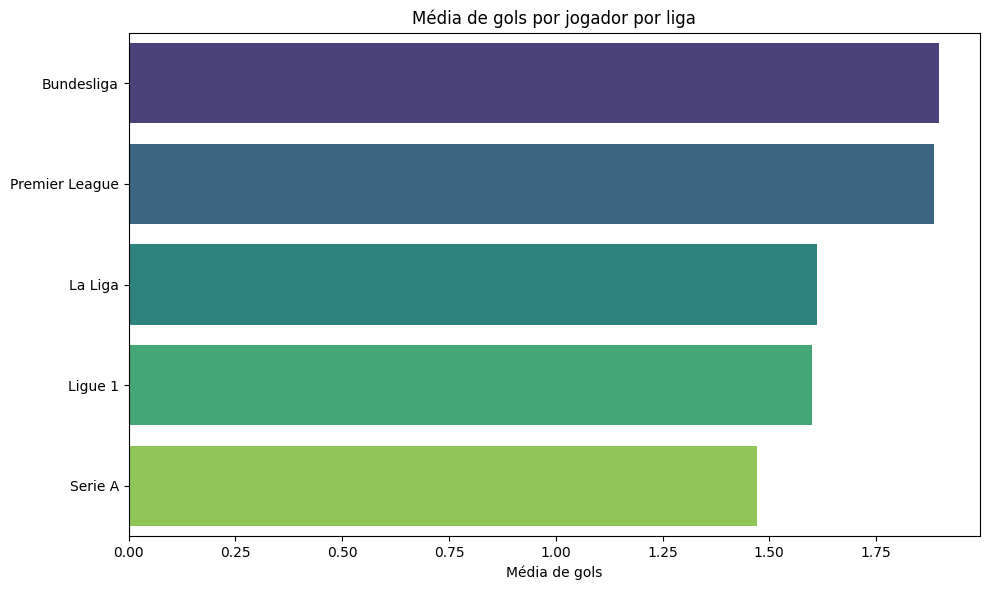

In [ ]:

# média de gols por liga
liga_goals = df.groupby('Comp')['Gls'].mean().sort_values(ascending=False)
print("Média de gols por jogador por liga:")
print(liga_goals)

plt.figure(figsize=(10, 6))

sns.barplot(
    x=liga_goals.values,
    y=liga_goals.index,
    palette='viridis'
)

plt.title("Média de gols por jogador por liga")
plt.xlabel("Média de gols")
plt.ylabel("")

plt.tight_layout()
plt.show()

Média de defensores por jogador por liga:
Comp
Premier League    33.806620
La Liga           30.745424
Bundesliga        29.949187
Ligue 1           29.896926
Serie A           27.015773
Name: Tkl+Int, dtype: float64


C:\Users\FROST\AppData\Local\Temp\ipykernel_11908\1005332348.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


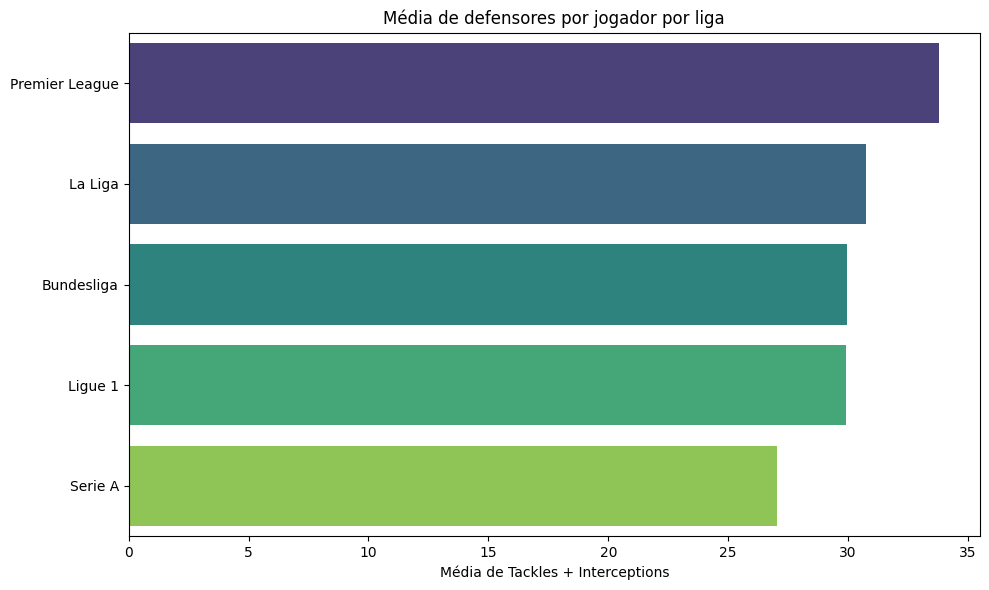

In [50]:
#media de defensores por liga
liga_defenders = df.groupby('Comp')['Tkl+Int'].mean().sort_values(ascending=False)
print("Média de defensores por jogador por liga:")          
print(liga_defenders)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=liga_defenders.values,
    y=liga_defenders.index,
    palette='viridis'
)
plt.title("Média de defensores por jogador por liga")
plt.xlabel("Média de Tackles + Interceptions")
plt.ylabel("")      
plt.tight_layout()
plt.show()

In [61]:
df.head(    )

,Player,Nation,Pos,Squad,Comp,Age,MP,Gls,Ast,G+A,KP,Tkl+Int,Saves,Gls_rank,Ast_rank,Tkl+Int_rank
0,Max Aarons,ENG,DF,Bournemouth,Premier League,24.0,3,0,0,0,0,3,NaN,2106.5,2080.5,2232.0
1,Max Aarons,ENG,DF,Valencia,La Liga,24.0,4,0,0,0,1,4,NaN,2106.5,2080.5,2152.5
2,Rodrigo Abajas,ESP,DF,Valencia,La Liga,21.0,1,0,0,0,0,4,NaN,2106.5,2080.5,2152.5
3,James Abankwah,IRL,DF,Udinese,Serie A,20.0,6,0,0,0,0,5,NaN,2106.5,2080.5,2087.0
4,Keyliane Abdallah,FRA,FW,Marseille,Ligue 1,18.0,1,0,0,0,0,1,NaN,2106.5,2080.5,2454.5


In [73]:
#filtrando os jogadore
goleiro= df[df['Pos'] == 'GK']
defensores = df[df['Pos'] == 'DF']
meio_campo = df[df['Pos'] == 'MF']
attaques = df[df['Pos'] == 'FW']


In [ ]:
#Dream Team - Top 11 jogadores com base em Gls, Ast e Tkl+Int
goleiro= df[df['Pos'] == 'GK'].sort_values(by='Saves', ascending=False).head(1)[['Player', 'Tkl+Int', 'Nation', 'Pos', 'Squad', 'Comp']]

defensores= df[df['Pos'] == 'DF'].sort_values(by='Tkl+Int', ascending=False).head(4)[['Player', 'Tkl+Int', 'Nation', 'Pos', 'Squad', 'Comp']]
meio_campo = df[df['Pos'] == 'MF'].sort_values(by='Gls', ascending=False).head(3)[['Player', 'Gls', 'Nation', 'Pos', 'Squad', 'Comp']]
atacantes = df[df['Pos'] == 'FW'].sort_values(by='Gls', ascending=False).head(3)[['Player', 'Gls', 'Nation', 'Pos', 'Squad', 'Comp']]

dream_team = pd.concat([goleiro, defensores, meio_campo, atacantes]).reset_index(drop=True)
print("Dream Team - Top 11 jogadores com base em Gls, Ast e Tkl")
display(dream_team)


Dream Team - Top 11 jogadores com base em Gls, Ast e Tkl


,Player,Tkl+Int,Nation,Pos,Squad,Comp,Gls
0,Mark Flekken,4.0,NED,GK,Brentford,Premier League,NaN
1,Daniel Muñoz,167.0,COL,DF,Crystal Palace,Premier League,NaN
2,Omar El Hilali,157.0,MAR,DF,Espanyol,La Liga,NaN
3,Antonee Robinson,157.0,USA,DF,Fulham,Premier League,NaN
4,Carmona,151.0,ESP,DF,Sevilla,La Liga,NaN
5,Oihan Sancet,NaN,ESP,MF,Athletic Club,La Liga,15.0
6,Matheus Cunha,NaN,BRA,MF,Wolves,Premier League,15.0
7,Ademola Lookman,NaN,NGA,MF,Atalanta,Serie A,15.0
8,Kylian Mbappé,NaN,FRA,FW,Real Madrid,La Liga,31.0
9,Mohamed Salah,NaN,EGY,FW,Liverpool,Premier League,29.0


Ligas com mais jogadores no Dream Team:
Comp
Premier League    5
La Liga           5
Serie A           1
Name: count, dtype: int64


C:\Users\FROST\AppData\Local\Temp\ipykernel_11908\729197636.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


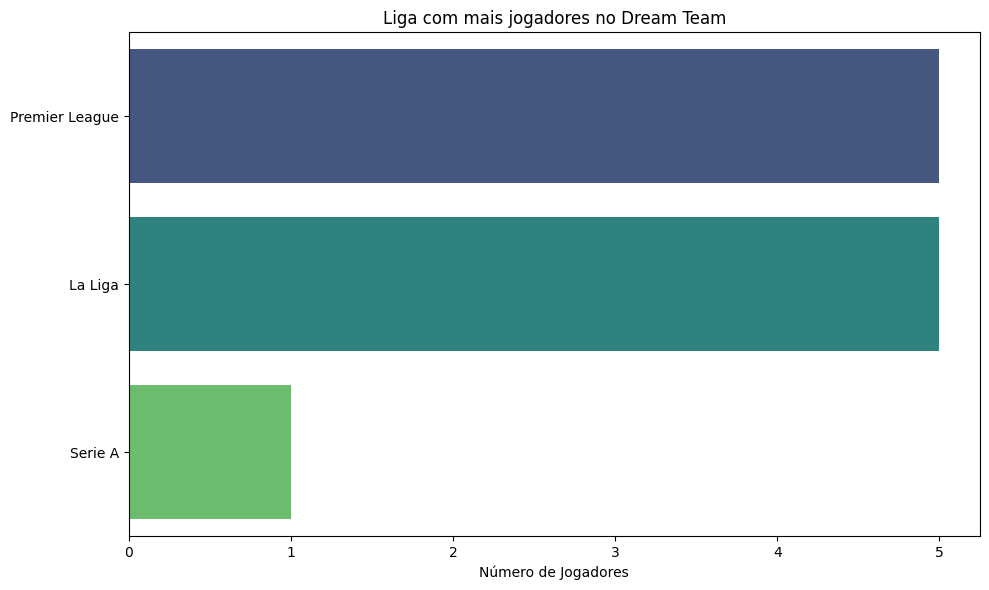

In [78]:
#Qual liga tem mais jogadores no Dream Team?
liga_dream_team = dream_team['Comp'].value_counts()
print("Ligas com mais jogadores no Dream Team:")
print(liga_dream_team)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=liga_dream_team.values,
    y=liga_dream_team.index,
    palette='viridis'
)
plt.title("Liga com mais jogadores no Dream Team")
plt.xlabel("Número de Jogadores")
plt.ylabel("")      
plt.tight_layout()
plt.show()

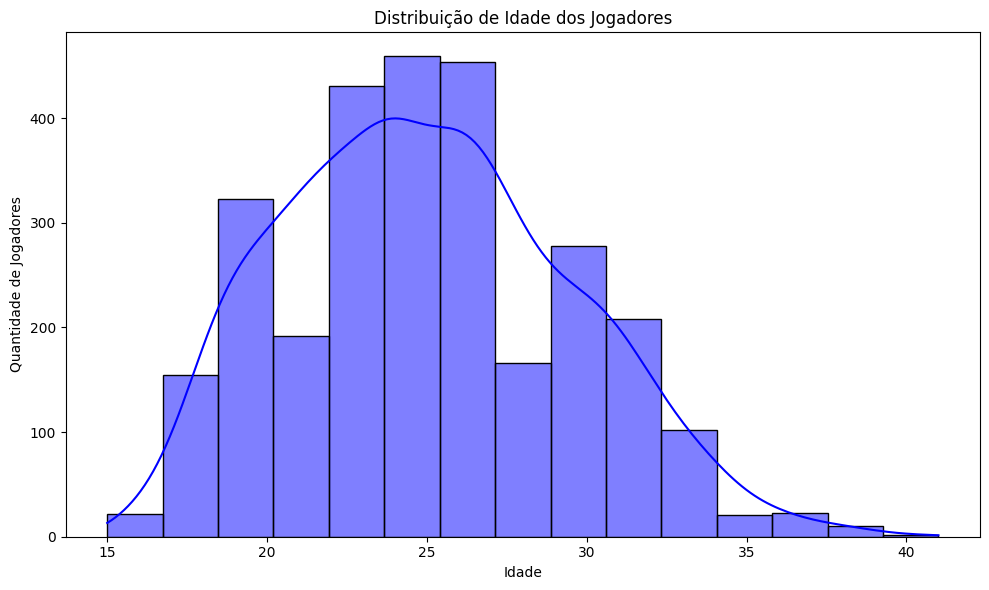

In [81]:
#analise de idade dos jogadores
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='blue')
plt.title("Distribuição de Idade dos Jogadores")    

plt.xlabel("Idade")
plt.ylabel("Quantidade de Jogadores")       
plt.tight_layout()
plt.show()

In [82]:
#media de gosls para jogadores abaixo de 21 anos
sub_21 = df[df['Age'] < 21]
media_gols_sub_21 = sub_21['Gls'].mean()
print(f"Média de gols por jogador abaixo de 21 anos: {media_gols_sub_21:.2f}")


Média de gols por jogador abaixo de 21 anos: 0.75


Média de gols por jogador abaixo de 21 anos por liga:
Comp
Bundesliga        0.791045
Ligue 1           0.783784
Premier League    0.765957
Serie A           0.693878
La Liga           0.688172
Name: Gls, dtype: float64


C:\Users\FROST\AppData\Local\Temp\ipykernel_11908\2688578711.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


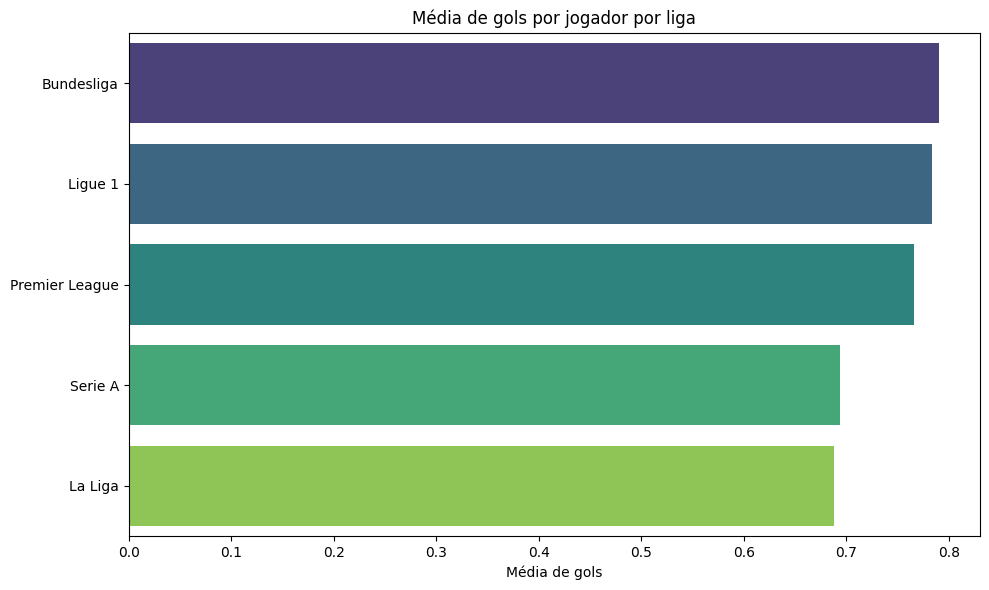

In [84]:
#media de gols sub  21 por liga
media_gols_sub_21_liga = sub_21.groupby('Comp')['Gls'].mean().sort_values(ascending=False)
print("Média de gols por jogador abaixo de 21 anos por liga:")  
print(media_gols_sub_21_liga)

plt.figure(figsize=(10, 6))

sns.barplot(
    x=media_gols_sub_21_liga.values,
    y=media_gols_sub_21_liga.index,
    palette='viridis'
)

plt.title("Média de gols por jogador por liga")
plt.xlabel("Média de gols")
plt.ylabel("")

plt.tight_layout()
plt.show()


Top 10 melhores jogadores abaixo de 21 anos por gols:
               Player  Gls Nation Pos          Squad            Comp
2496    Lucas Stassin   12    BEL  FW  Saint-Étienne         Ligue 1
2346    Andrey Santos   10    BRA  MF     Strasbourg         Ligue 1
2792     Lamine Yamal    9    ESP  FW      Barcelona         La Liga
509   Santiago Castro    8    ARG  FW        Bologna         Serie A
1010    Jamie Gittens    8    ENG  FW       Dortmund      Bundesliga
541      Rayan Cherki    8    FRA  FW           Lyon         Ligue 1
712       Assane Diao    8    SEN  FW           Como         Serie A
2799     Kenan Yıldız    7    TUR  FW       Juventus         Serie A
798       Jáder Durán    7    COL  FW    Aston Villa  Premier League
2056      Nicolás Paz    6    ARG  MF           Como         Serie A


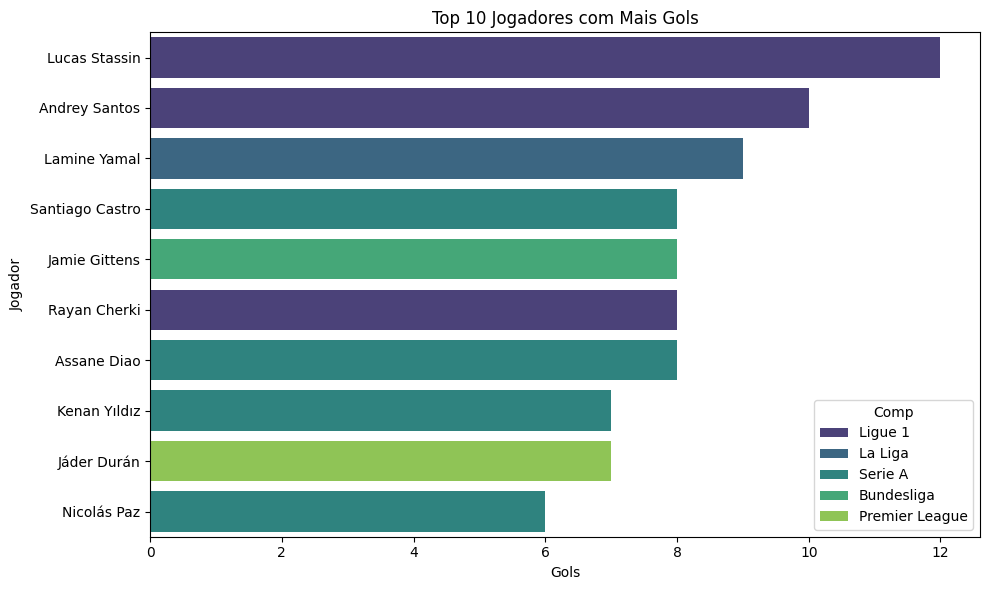

In [86]:
#jovem com mais gols
melhor_jovem = sub_21.sort_values(by='Gls', ascending=False).head(10)
print("Top 10 melhores jogadores abaixo de 21 anos por gols:")  
print(melhor_jovem[['Player', 'Gls', 'Nation', 'Pos', 'Squad', 'Comp']])

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=melhor_jovem,
    x='Gls',
    y='Player',
    palette='viridis',
      hue='Comp'
)
ax.set_title("Top 10 Jogadores com Mais Gols")
ax.set_xlabel("Gols")
ax.set_ylabel("Jogador")
plt.tight_layout()
plt.show()

Top 10 melhores jogadores abaixo de 21 anos por gols e assistências:
               Player  G+A Nation Pos          Squad        Comp
2792     Lamine Yamal   22    ESP  FW      Barcelona     La Liga
541      Rayan Cherki   19    FRA  FW           Lyon     Ligue 1
2496    Lucas Stassin   16    BEL  FW  Saint-Étienne     Ligue 1
2056      Nicolás Paz   14    ARG  MF           Como     Serie A
2346    Andrey Santos   13    BRA  MF     Strasbourg     Ligue 1
775       Désiré Doué   12    FRA  FW      Paris S-G     Ligue 1
509   Santiago Castro   12    ARG  FW        Bologna     Serie A
1887       João Neves   11    POR  MF      Paris S-G     Ligue 1
2799     Kenan Yıldız   11    TUR  FW       Juventus     Serie A
1010    Jamie Gittens   11    ENG  FW       Dortmund  Bundesliga


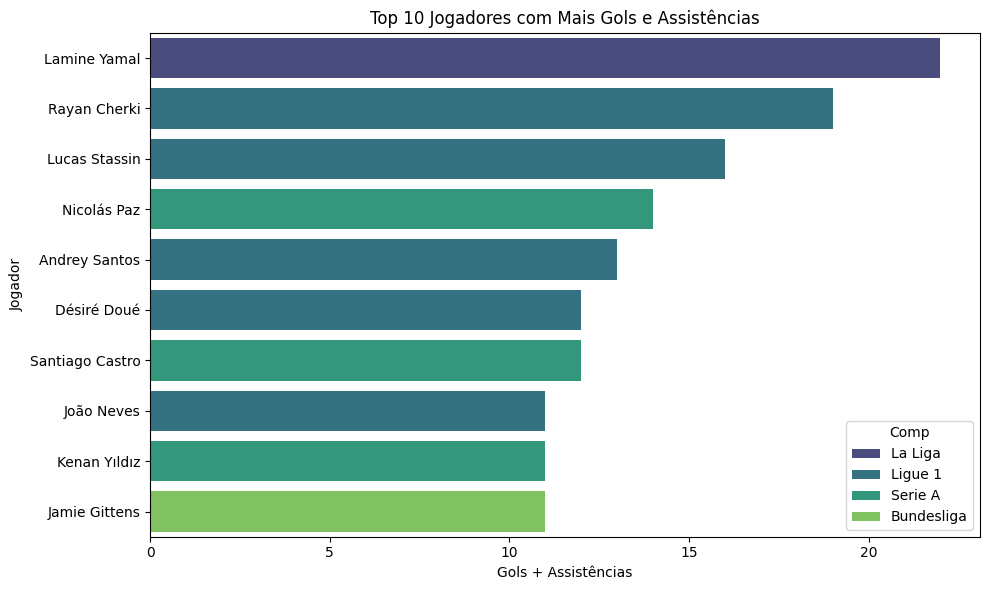

In [87]:
# melhor jovem com mais gols e assistencias
melhor_jovem_gols_assistencias = sub_21.sort_values(by='G+A', ascending=False).head(10)
print("Top 10 melhores jogadores abaixo de 21 anos por gols e assistências:")
print(melhor_jovem_gols_assistencias[['Player', 'G+A', 'Nation', 'Pos', 'Squad', 'Comp']])
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(
    data=melhor_jovem_gols_assistencias,
    x='G+A',
    y='Player',
    palette='viridis',
      hue='Comp'
)
ax.set_title("Top 10 Jogadores com Mais Gols e Assistências")
ax.set_xlabel("Gols + Assistências")    
ax.set_ylabel("Jogador")
plt.tight_layout()
plt.show()

Média de participações em gols (G+A) por jogador abaixo de 21 anos por liga:
Comp
Ligue 1           1.459459
Premier League    1.457447
Bundesliga        1.417910
La Liga           1.258065
Serie A           1.153061
Name: G+A, dtype: float64


C:\Users\FROST\AppData\Local\Temp\ipykernel_11908\2088045590.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


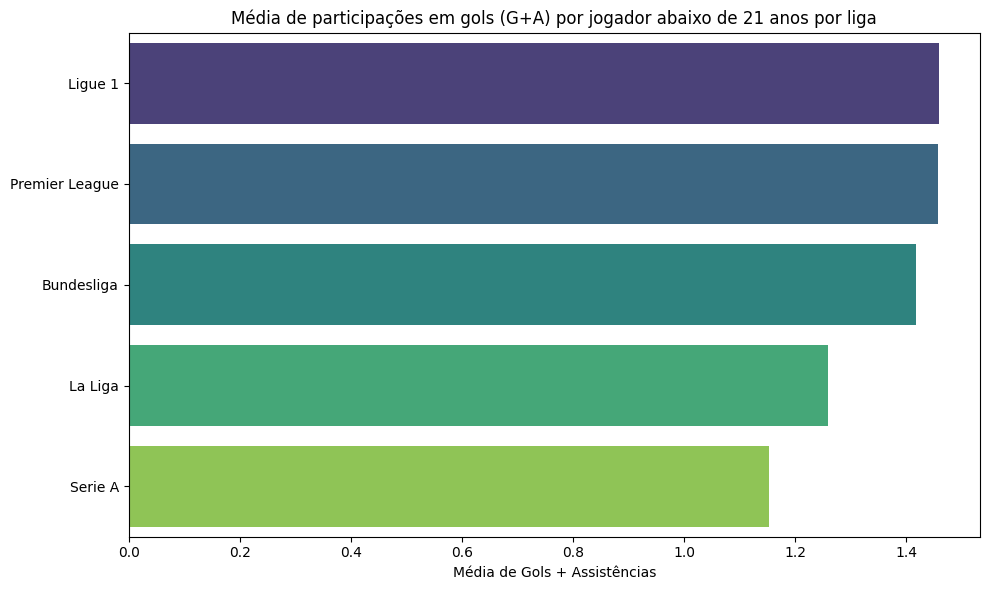

In [88]:
#melhor jovem com particpaçao em gols e assistencias por liga
melhor_jovem_gols_assistencias_liga = sub_21.groupby('Comp')['G+A'].mean().sort_values(ascending=False)
print("Média de participações em gols (G+A) por jogador abaixo de 21 anos por liga:")
print(melhor_jovem_gols_assistencias_liga)  
plt.figure(figsize=(10, 6))
sns.barplot(
    x=melhor_jovem_gols_assistencias_liga.values,
    y=melhor_jovem_gols_assistencias_liga.index,
    palette='viridis'
)   
plt.title("Média de participações em gols (G+A) por jogador abaixo de 21 anos por liga")
plt.xlabel("Média de Gols + Assistências")
plt.ylabel("")
plt.tight_layout()
plt.show()


Top 10 melhores jogadores brasileiros por gols:
                  Player  Gls Nation Pos        Squad            Comp
2177            Raphinha   18    BRA  FW    Barcelona         La Liga
637        Matheus Cunha   15    BRA  MF       Wolves  Premier League
1289     Vinicius Júnior   11    BRA  FW  Real Madrid         La Liga
861            Evanilson   10    BRA  FW  Bournemouth  Premier League
1261          João Pedro   10    BRA  FW     Brighton  Premier League
2346       Andrey Santos   10    BRA  MF   Strasbourg         Ligue 1
1820       Rodrigo Muniz    8    BRA  FW       Fulham  Premier League
1644  Gabriel Martinelli    8    BRA  FW      Arsenal  Premier League
1144       Luis Henrique    7    BRA  DF    Marseille         Ligue 1
1285               Jubal    6    BRA  DF      Auxerre         Ligue 1


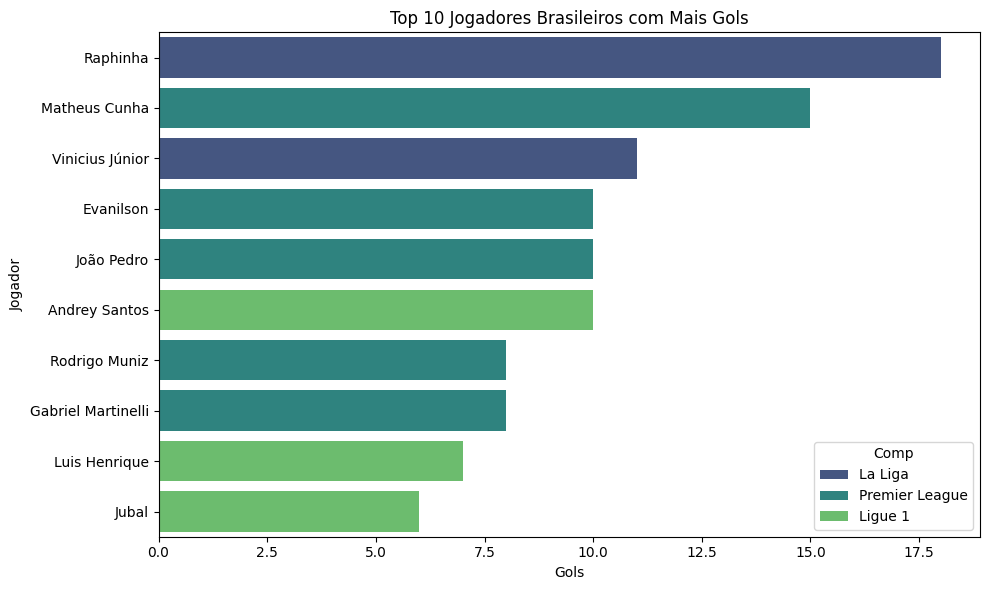

In [90]:
#mlhor brasileiro
melhor_brasileiro = df[df['Nation'] == 'BRA'].sort_values(by='Gls', ascending=False).head(10)
print("Top 10 melhores jogadores brasileiros por gols:")
print(melhor_brasileiro[['Player', 'Gls', 'Nation', 'Pos', 'Squad', 'Comp']])
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(
    data=melhor_brasileiro,
    x='Gls',
    y='Player',
    palette='viridis',
      hue='Comp'
)
ax.set_title("Top 10 Jogadores Brasileiros com Mais Gols")
ax.set_xlabel("Gols")
ax.set_ylabel("Jogador")
plt.tight_layout()
plt.show()

Top 10 melhores jogadores brasileiros por participações em gols (G+A):
                  Player  G+A Nation Pos          Squad            Comp
2177            Raphinha   27    BRA  FW      Barcelona         La Liga
637        Matheus Cunha   21    BRA  MF         Wolves  Premier League
1289     Vinicius Júnior   19    BRA  FW    Real Madrid         La Liga
1261          João Pedro   16    BRA  FW       Brighton  Premier League
1144       Luis Henrique   14    BRA  DF      Marseille         Ligue 1
2346       Andrey Santos   13    BRA  MF     Strasbourg         Ligue 1
1644  Gabriel Martinelli   12    BRA  FW        Arsenal  Premier League
861            Evanilson   11    BRA  FW    Bournemouth  Premier League
1090     Bruno Guimarães   11    BRA  MF  Newcastle Utd  Premier League
2242             Rodrygo   11    BRA  FW    Real Madrid         La Liga


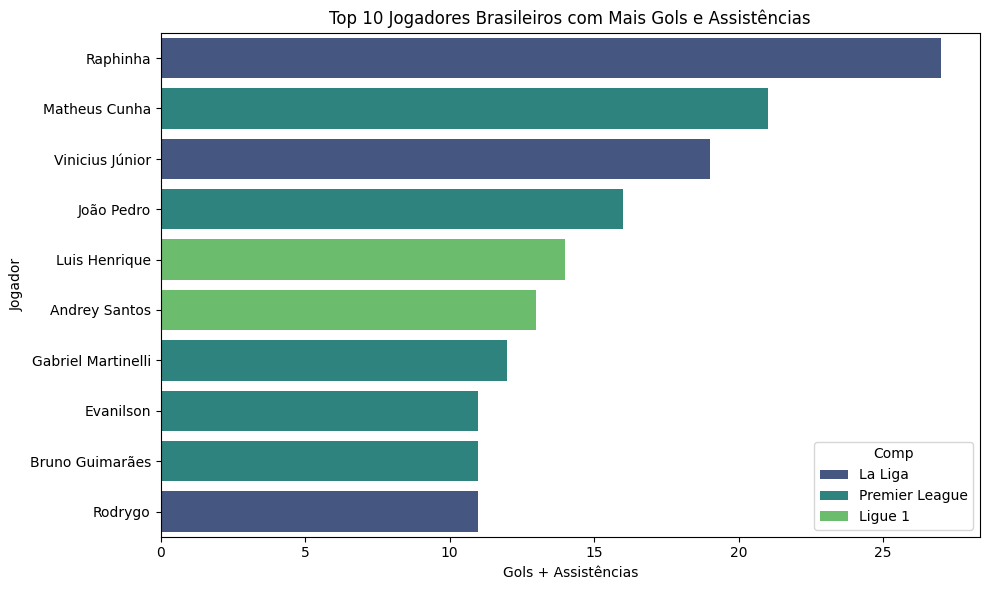

In [91]:
# BRASILLEIROS COM MAIS PARTICVIPAÇÕES EM GOLS E ASSISTENCIAS
melhor_brasileiro_gols_assistencias = df[df['Nation'] == 'BRA'].sort_values(by='G+A', ascending=False).head(10)
print("Top 10 melhores jogadores brasileiros por participações em gols (G+A):")
print(melhor_brasileiro_gols_assistencias[['Player', 'G+A', 'Nation', 'Pos', 'Squad', 'Comp']]) 
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=melhor_brasileiro_gols_assistencias,
    x='G+A',
    y='Player',
    palette='viridis',
      hue='Comp'
)  
ax.set_title("Top 10 Jogadores Brasileiros com Mais Gols e Assistências")
ax.set_xlabel("Gols + Assistências")
ax.set_ylabel("Jogador")
plt.tight_layout()
plt.show()

Média de gols por jogador brasileiro por liga:
Comp
La Liga           3.000000
Premier League    2.470588
Ligue 1           2.200000
Serie A           1.333333
Bundesliga        0.750000
Name: Gls, dtype: float64


C:\Users\FROST\AppData\Local\Temp\ipykernel_11908\4190096909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


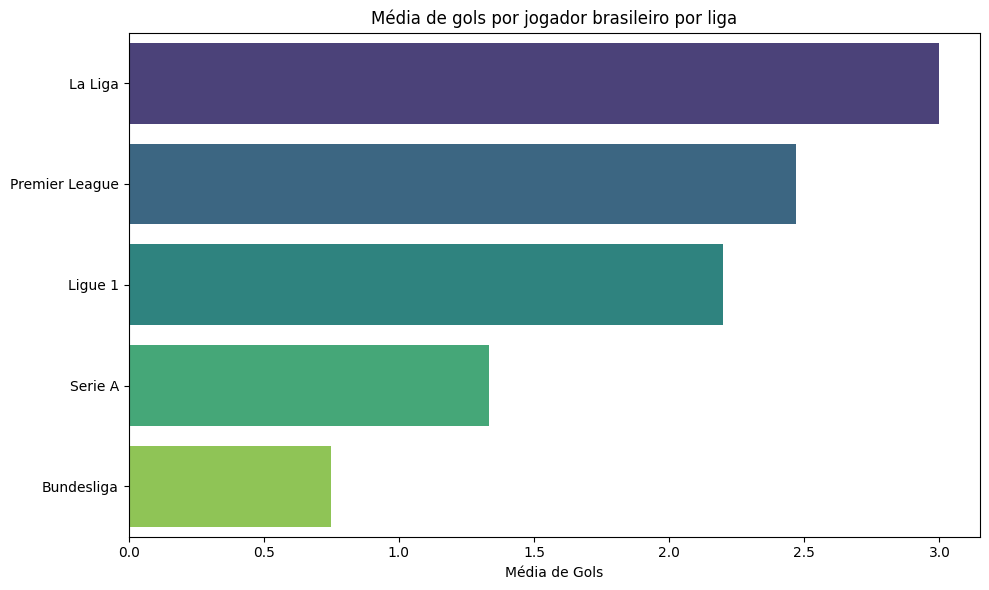

In [92]:
#MELHOR BRASILEIRO POR LIGA
melhor_brasileiro_liga = df[df['Nation'] == 'BRA'].groupby('Comp')['Gls'].mean().sort_values(ascending=False)
print("Média de gols por jogador brasileiro por liga:")         
print(melhor_brasileiro_liga)   
plt.figure(figsize=(10, 6))
sns.barplot(    
    x=melhor_brasileiro_liga.values,
    y=melhor_brasileiro_liga.index,
    palette='viridis'
)
plt.title("Média de gols por jogador brasileiro por liga")
plt.xlabel("Média de Gols")
plt.ylabel("")
plt.tight_layout()
plt.show()

Top 10 melhores defensores brasileiros por Tackles + Interceptions:
                   Player  Tkl+Int Nation Pos            Squad            Comp
2671            Vanderson      115    BRA  DF           Monaco         Ligue 1
1828              Murillo       89    BRA  DF  Nott'ham Forest  Premier League
534         Arthur Chaves       88    BRA  DF       Hoffenheim      Bundesliga
1285                Jubal       85    BRA  DF          Auxerre         Ligue 1
2641                 Tuta       84    BRA  DF   Eint Frankfurt      Bundesliga
1962  Lucas Oliveira Rosa       81    BRA  DF       Valladolid         La Liga
754                  Dodô       78    BRA  DF       Fiorentina         Serie A
315              Bernardo       72    BRA  DF           Bochum      Bundesliga
662                 Dante       66    BRA  DF             Nice         Ligue 1
1858                Natan       63    BRA  DF            Betis         La Liga


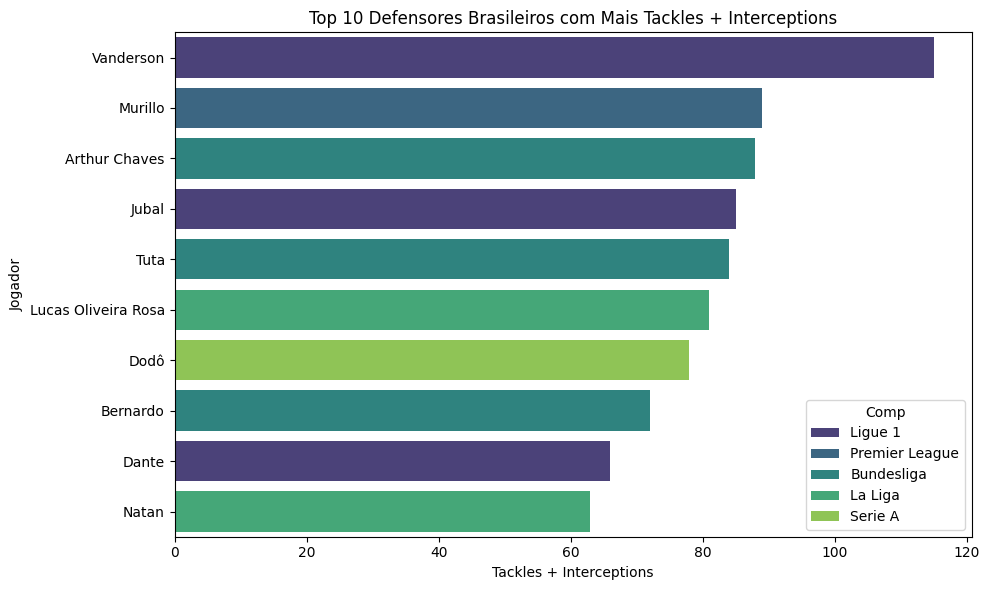

In [93]:
#MELHOR DEFESOR BRASILEIRO
melhor_defensor_brasileiro = df[(df['Nation'] == 'BRA') & (df['Pos'] == 'DF')].sort_values(by='Tkl+Int', ascending=False).head(10)
print("Top 10 melhores defensores brasileiros por Tackles + Interceptions:")    
print(melhor_defensor_brasileiro[['Player', 'Tkl+Int', 'Nation', 'Pos', 'Squad', 'Comp']])
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=melhor_defensor_brasileiro,
    x='Tkl+Int',
    y='Player',
    palette='viridis',
      hue='Comp'
)   
ax.set_title("Top 10 Defensores Brasileiros com Mais Tackles + Interceptions")
ax.set_xlabel("Tackles + Interceptions")
ax.set_ylabel("Jogador")
plt.tight_layout()
plt.show()